# 군집

군집(Clustering) 분석은 데이터셋의 관측값이 갖고 있는 여러 속성을 분석하여 서로 비슷한 특징을 갖는 관측값끼리 같은 클러스터(집단)으로 묶는 알고리즘이다. 다른 클러스터 간에는 서로 완전하게 구분되는 특징을 갖기 때문에 어느 클러스터에도 속하지 못하는 관측값이 존재할 수 있다. 이런 특성을 이용하여 특이 데이터(이상값, 중복값 등)를 찾는데 활용하기도 한다.

한편 군집 분석은 비지도학습 유형이다. 관측값을 몇 개의 집단으로 나눈다는 점에서 분류 알고리즘과 비슷하지만 군집 분석은 정답이 없는 상태에서 데이터 자체를 유사성만을 기준으로 판단하는 점에서 정답을 알고 있는 상태에서 학습 과정을 거치는 분류 알고리즘과 차이가 있다.

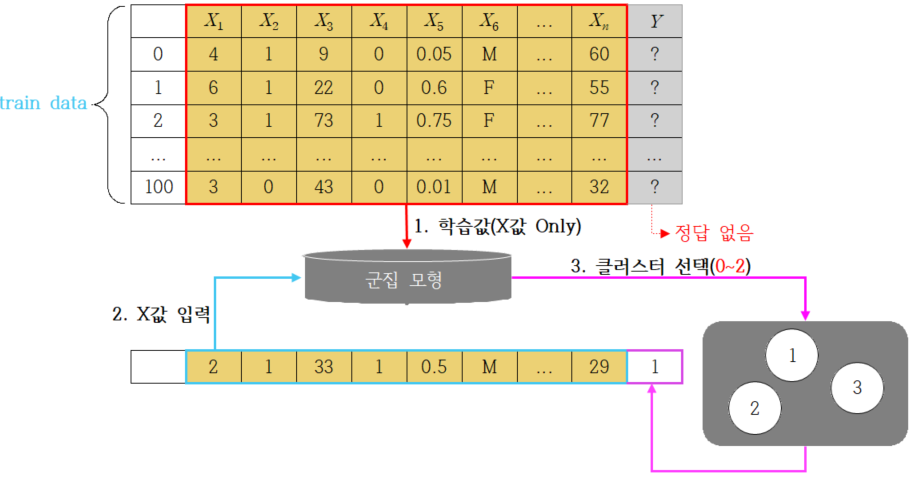



군집 알고리즘은 신용카드 부정 사용 탐지, 구매 패턴 분석 등 소비자 행동 특성을 그룹화하는데 사용된다. 어떤 소비자와 유사한 특성을 갖는 집단을 구분하게 되면, 같은 집단 내의 다른 소비자를 통해 새로운 소비자의 구매 패턴이나 행동 등을 예측하는데 활용할 수 있다. 여러 가지 알고리즘이 존재하는데, k-Means 알고리즘과 DBSCAN 알고리즘에 대해 공부할 것이다.

* k-Means

k-Means 알고리즘은 데이터 간의 유사성을 측정하는 기준으로 각 클러스터의 중심까지의 거리를 이용한다. 벡터 공간에 위치한 어떤 데이터에 대하여 k개의 클러스터가 주어졌을 때 클러스터의 중심까지의 거리가 가장 가까운 클러스터로 해당 데이터를 할당한다. 다른 클러스터 간에는 서로 다른 완전하게 구분하기 위하여 일정한 거리 이상 떨어져야 한다. 

한편 몇 개의 클러스터로 데이터를 구분할 것인지를 결한하는 k 값에 따라 성능이 달라진다. 일반적으로 k가 클수록 모형의 정확도는 개선되지만, k값이 너무 커지면 선택지가 너무 많아지므로 분석의 효과는 사라진다.

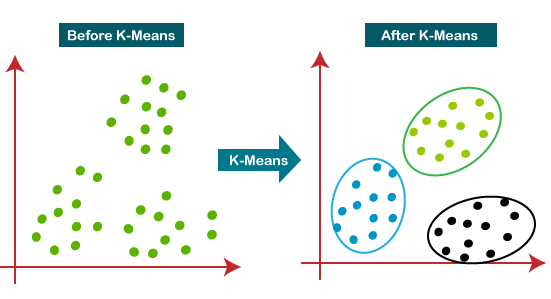

#### 데이터 준비 / 데이터 탐색

UCI 머신러닝 저장소에서 제공하는 도매업 고개(wholesale customers) 데이터셋을 사용한다. 각 고객의 연간 구매금액을 상품 카테고리별로 구분하여 정리한 데이터이다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)

# 데이터 살펴보기
print(df.head())
print()

# 데이터 자료형 확인
print(df.info())
print()

# 데이터 통계 요약 정보 확인
print(df.describe())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen 

In [2]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

모두 8개의 열에 440개의 관측값이 행으로 구현된다. 첫 2개 열은 상품 구매금액이 아니라 고객의 일반 정보를 가지고 있다. 'Channel' 열은 호텔/레스토랑 또는 소매업 등 판매채널 값이고, 'Region' 열은 고객 소재지를 나타낸다.

데이터프레임 전체를 모형의 학습 데이터로 사용한다. 비지도 학습 모형이므로 예측 변수를 지정할 필요가 없고 필요한 속성을 모두 독립 변수로 활용한다.

StandardScaler() 함수 등을 이용하여 학습 데이터를 정규화하면 모형 학습을 위한 준비가 끝난다. 이를 통해 서로 다른 변수 사이에 존재할 수 있는 데이터 값의 상대적 크기 차이에서 발생하는 오류를 제거한다.

#### 데이터 전처리

In [3]:
# 분석에 사용할 속성으로 모두 선택
X = df.iloc[:, :]
print(X.head(5))
print('\n')

# 독립 변수 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


#### 모형 학습 및 검증

sklearn 라이브러리의 cluster 모듈을 활용한다. KMeans() 함수로 모형 객체를 생성하는데, n_clusters 옵션을 사용하여 클러스터의 개수를 5개로 지정한다. 위에서 선택한 학습 데이터를 fit() 메소드에 전달하고 모형에 적용하면 모형은 스스로 학습하여 설정한 클러스터 개수만큼 데이터를 구분한다. 모형의 labels_ 속성에 구분한 클러스터 값이 입력된다.

In [4]:
from sklearn import cluster

# 모형 객체 생성
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

# 모형 학습
kmeans.fit(X)

# 예측(군집)
cluster_label = kmeans.labels_

print(cluster_label)

[2 2 2 4 2 2 2 2 4 2 2 2 2 2 2 4 2 4 2 4 2 4 4 0 2 2 4 4 2 4 4 4 4 4 4 2 4
 2 2 4 4 4 2 2 2 2 2 3 2 2 4 4 2 2 4 4 3 2 4 4 2 3 2 2 4 3 4 2 4 4 4 4 4 2
 2 4 4 2 4 4 4 2 2 4 2 3 3 0 4 4 4 4 3 4 2 4 2 4 4 4 2 2 2 4 4 4 2 2 2 2 4
 2 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4
 4 4 4 4 4 4 4 2 2 4 2 2 2 4 4 2 2 2 2 4 4 4 2 2 4 2 4 2 4 4 4 4 4 0 4 0 4
 4 4 4 2 2 4 4 4 2 4 4 1 2 1 1 2 2 1 1 1 2 1 1 1 2 1 3 1 1 2 1 2 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 3 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 2 1 2 1 1 1 1 4 4 4 4 4 4 2 4 2 4 4 4 4 4 4 4 4 4 4 4 2 1 2
 1 2 2 1 2 2 2 2 2 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 0 1 1 1 1 1 2 1
 3 1 2 1 1 1 1 2 2 4 2 4 4 2 2 4 2 4 2 4 2 4 4 4 2 4 4 4 4 4 4 4 2 4 4 4 4
 2 4 4 2 4 4 2 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4
 2 2 4 4 4 4 4 4 2 2 4 2 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4]


cluster_label에 클러스터 값을 저장하여 출력한 결과를 보면, 0~4 범위의 5개의 클러스터가 확인된다. 

이제 'Cluster' 열에 모형이 예측한 클러스터 값을 입력하고, 원본 데이터프레임에 새로운 열로 추가한다. 각 데이터가 모형에 의해 어떤 클러스터에 할당되었는지 한눈에 볼 수 있다. (단, 매번 실행할 때마다 예측값의 결과가 달라지는 점을 유의!)

In [5]:
#  예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())

   Channel  Region  Fresh  Milk  ...  Frozen  Detergents_Paper  Delicassen  Cluster
0        2       3  12669  9656  ...     214              2674        1338        2
1        2       3   7057  9810  ...    1762              3293        1776        2
2        2       3   6353  8808  ...    2405              3516        7844        2
3        1       3  13265  1196  ...    6404               507        1788        4
4        2       3  22615  5410  ...    3915              1777        5185        2

[5 rows x 9 columns]


모형은 8개의 속성(변수)을 이용하여 각 관측값을 5개의 클러스터로 구분한다. 8개의 변수를 하나의 그래프로 표현할 수 없기 때문에 2개의 변수를 선택하여 관측값의 분포를 그려보자.

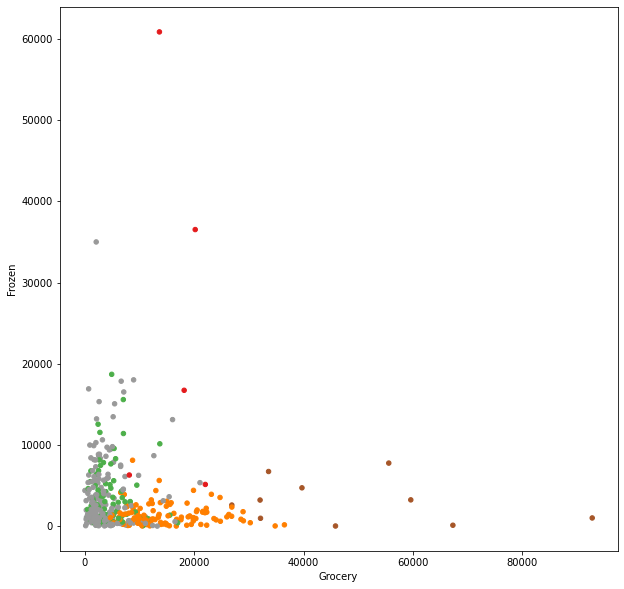

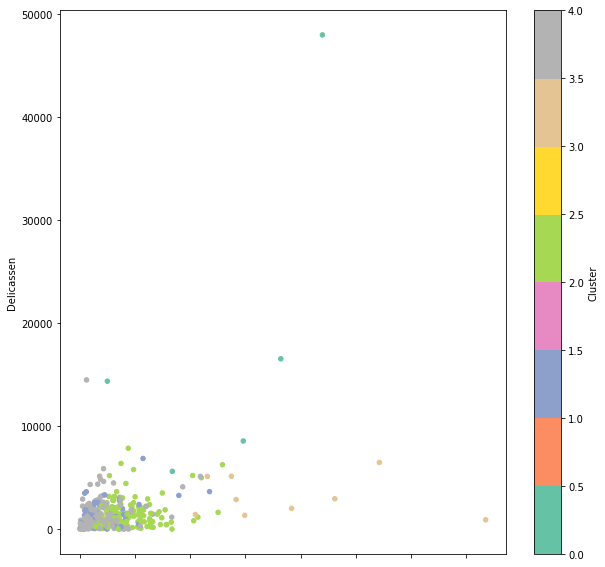

In [6]:
# 그래프 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', colorbar=False, figsize=(10,10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set2', colorbar=True, figsize=(10,10))
plt.show()
plt.close()

다른 값들에 비해 지나치게 큰 값으로 구성되는 클러스터에 속하는 값들을 제외하고 다시 그러본다. 데이터들이 몰려있는 구간을 확대해서 자세하게 파악할 수 있다. 클러스터 라벨이 0, 4인 데이터를 제외하고 클러터 1, 2, 3에 속하는 데이터만을 변수 ndf에 저장한다. 그리고 다시 그래프를 그려 분포를 확인하자.

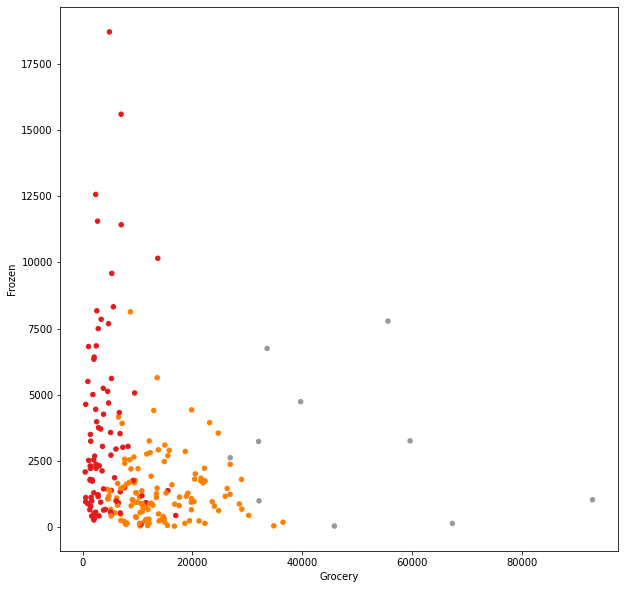

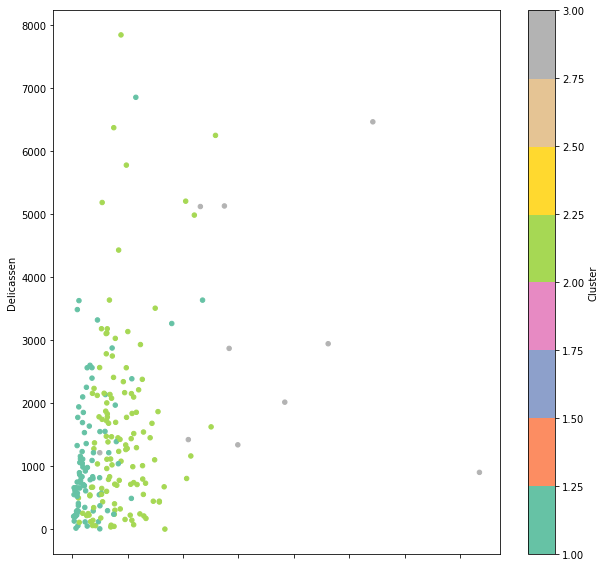

In [7]:
# 큰 값으로 구성된 클러스터(0, 4) 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', colorbar=False, figsize=(10, 10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set2', colorbar=True, figsize=(10, 10))
plt.show()
plt.close()